# CLUSTERING OF IRIS FLOWER USING PETAL LENGTH AND WIDTH FEATURES

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [23]:
iris=load_iris()

In [24]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Text(0, 0.5, 'petal width')

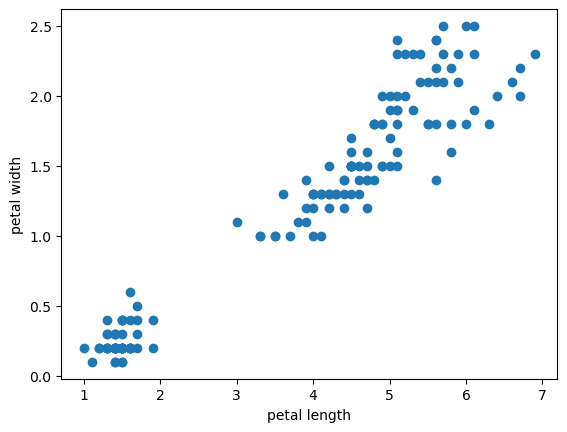

In [25]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.xlabel('petal length')
plt.ylabel('petal width')

In [26]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)

In [27]:
predict=km.fit_predict(df[['petal length (cm)','petal width (cm)']])
predict

C:\Users\mdsk5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mdsk5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
centro=km.cluster_centers_
centro

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [29]:
x=df[['petal length (cm)','petal width (cm)']]
x['prediction']=predict
x

C:\Users\mdsk5\AppData\Local\Temp\ipykernel_12152\1269964193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['prediction']=predict


,petal length (cm),petal width (cm),prediction
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [30]:
df1=x[x.prediction==0]
df2=x[x.prediction==1]
df3=x[x.prediction==2]


Text(0, 0.5, 'petal width')

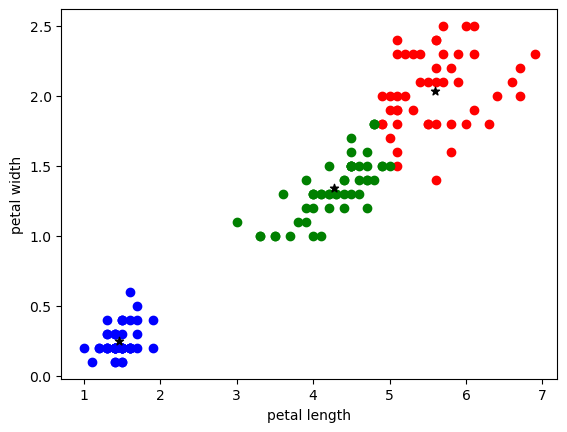

In [31]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='r')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='b')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='g')
plt.scatter(centro[:,0],centro[:,1],color='black',marker='*')
plt.xlabel('petal length')
plt.ylabel('petal width')


# axis scaling

In [32]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale.fit(x[['petal length (cm)']])
x['p_len']=scale.transform(x[['petal length (cm)']])

scale.fit(x[['petal width (cm)']])
x['p_wid']=scale.transform(x[['petal width (cm)']])
x


,petal length (cm),petal width (cm),prediction,p_len,p_wid
0,1.4,0.2,1,0.067797,0.041667
1,1.4,0.2,1,0.067797,0.041667
2,1.3,0.2,1,0.050847,0.041667
3,1.5,0.2,1,0.084746,0.041667
4,1.4,0.2,1,0.067797,0.041667
...,...,...,...,...,...
145,5.2,2.3,0,0.711864,0.916667
146,5.0,1.9,0,0.677966,0.750000
147,5.2,2.0,0,0.711864,0.791667
148,5.4,2.3,0,0.745763,0.916667


In [33]:
xx=x.drop(['petal length (cm)','petal width (cm)','prediction'],axis='columns')
xx

,p_len,p_wid
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


Text(0, 0.5, 'petal width')

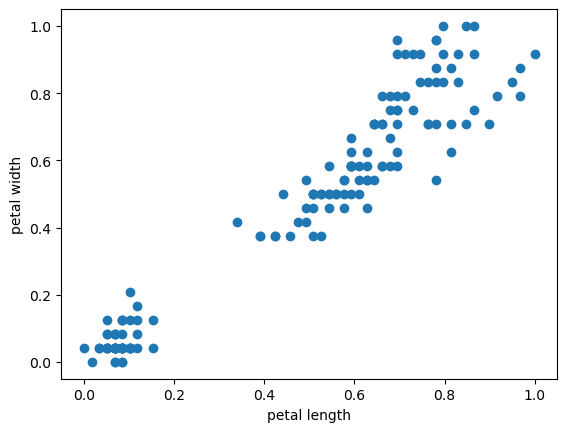

In [34]:
plt.scatter(xx['p_len'],xx['p_wid'])
plt.xlabel('petal length')
plt.ylabel('petal width')

In [35]:
km1=KMeans(n_clusters=3)
pre=km1.fit_predict(xx)
xx['pre']=pre
xx

C:\Users\mdsk5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mdsk5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,p_len,p_wid,pre
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


In [36]:
centro1=km1.cluster_centers_
centro1

array([[0.7740113 , 0.81510417],
       [0.07830508, 0.06083333],
       [0.55867014, 0.51041667]])

In [37]:
df11=xx[xx.pre==0]
df22=xx[xx.pre==1]
df33=xx[xx.pre==2]


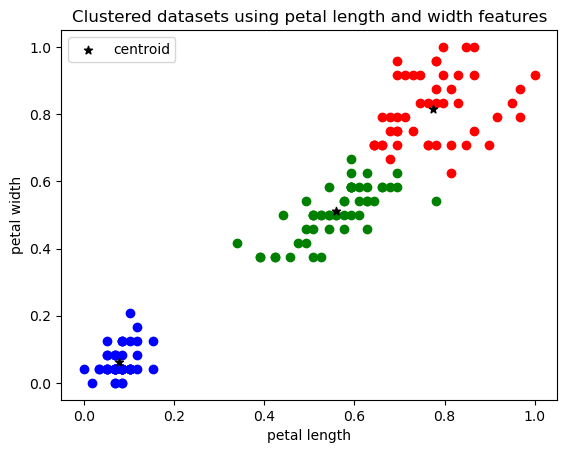

In [38]:
plt.scatter(df11['p_len'],df11['p_wid'],color='r')
plt.scatter(df22['p_len'],df22['p_wid'],color='b')
plt.scatter(df33['p_len'],df33['p_wid'],color='g')
plt.scatter(centro1[:,0],centro1[:,1],color='black',marker='*',label='centroid')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Clustered datasets using petal length and width features')
plt.legend()

# elbow method

In [39]:
krang=np.arange(1,11,1)
krang

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [40]:
sse=[]   #SUM OF SQUARED ERROR
for k in krang:
    km=KMeans(n_clusters=k)
    km.fit_predict(xx)
    sse.append(km.inertia_)    #inertia gives the sse correspondinf k

C:\Users\mdsk5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mdsk5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mdsk5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mdsk5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [41]:
sse

[128.2616865530605,
 38.226158848250265,
 1.701874688192097,
 1.2555382834168465,
 0.8538617353912241,
 0.6803604930647139,
 0.565127345570398,
 0.48580845539143697,
 0.4132667782512474,
 0.3659086896974334]

Text(0, 0.5, 'sum of squared error')

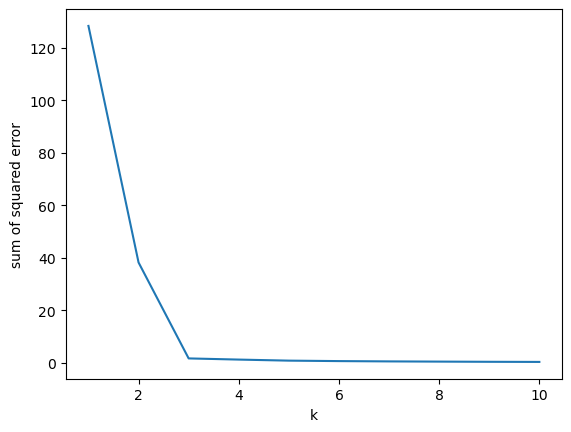

In [42]:
plt.plot(krang,sse)
plt.xlabel('k')
plt.ylabel('sum of squared error')

# FROM ELBOW METHOD THE NO OF CLUSTERING IS 3